In [126]:
import pandas as pd
import numpy as np

ssDF = pd.read_csv(
    "C:\\Users\\OZGUN\\Documents\\GitHub\\iuc-mak-pro-i\\output\\single_slope_dataframe.csv")
ssDF.head()

,ride_index,start_lat,start_lon,end_lat,end_lon,distance_covered,distance_since_start,elevation_change,elevation,time_since_start,time_elapsed,pct_of_total_ride,elevation_gain,elevation_lost,avg_velocity_kmh,slope_percentage,total_climb_since_start,all_time_avg_kmh,is_he_resting
0,1,40.181009,26.359442,40.184964,26.353516,783.85,0.00,15.5,6.8,0.0,221.0,2.12,15.4,0.0,12.77,2.0,15.4,9.41,False
1,1,40.184964,26.353516,40.191360,26.357408,771.79,783.85,-15.5,22.3,221.0,126.0,2.08,1.7,17.0,22.05,-2.0,17.1,9.41,False
2,1,40.191360,26.357408,40.193555,26.359788,242.77,1555.64,3.3,6.8,347.0,84.0,0.66,3.0,0.1,10.40,1.0,20.1,9.41,False
3,1,40.193555,26.359788,40.198779,26.358954,696.57,1798.41,-4.7,10.1,431.0,157.0,1.88,0.6,4.9,15.97,0.0,20.7,9.41,False
4,1,40.198779,26.358954,40.201196,26.356685,332.53,2494.98,2.6,5.4,588.0,69.0,0.90,2.5,0.1,17.35,1.0,23.2,9.41,False


In [127]:
ssDF.drop(ssDF[ssDF.distance_covered < 3].index, inplace=True)
ssDF.drop(ssDF[ssDF.avg_velocity_kmh < 7].index, inplace=True)
ssDF.drop(ssDF[ssDF.slope_percentage > 8].index, inplace=True)
ssDF.drop(ssDF[ssDF.slope_percentage < -8].index, inplace=True)

In [128]:
ssDF = ssDF[['slope_percentage','distance_covered','distance_since_start','total_climb_since_start','avg_velocity_kmh']]
ssDF.head()

,slope_percentage,distance_covered,distance_since_start,total_climb_since_start,avg_velocity_kmh
0,2.0,783.85,0.00,15.4,12.77
1,-2.0,771.79,783.85,17.1,22.05
2,1.0,242.77,1555.64,20.1,10.40
3,0.0,696.57,1798.41,20.7,15.97
4,1.0,332.53,2494.98,23.2,17.35


In [129]:
ssDF.reset_index(drop=True)
ssDF.head()

,slope_percentage,distance_covered,distance_since_start,total_climb_since_start,avg_velocity_kmh
0,2.0,783.85,0.00,15.4,12.77
1,-2.0,771.79,783.85,17.1,22.05
2,1.0,242.77,1555.64,20.1,10.40
3,0.0,696.57,1798.41,20.7,15.97
4,1.0,332.53,2494.98,23.2,17.35


In [130]:
from sklearn.model_selection import train_test_split
X = ssDF.drop("avg_velocity_kmh", axis=1)
y = ssDF["avg_velocity_kmh"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [131]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.15842714380655487

In [132]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.16374518969953245

In [133]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.17353259306502833

In [134]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.34259766753959686

In [135]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Feature Importance')

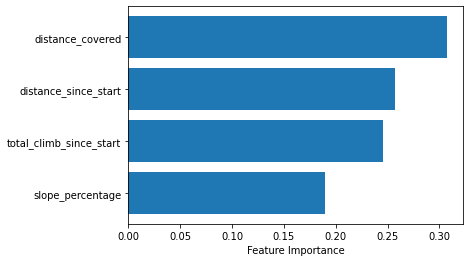

In [136]:
sort = model.feature_importances_.argsort()
plt.barh(X.columns[sort], model.feature_importances_[sort])
plt.xlabel("Feature Importance")

Feature: 0, Score: 0.18968
Feature: 1, Score: 0.30761
Feature: 2, Score: 0.25698
Feature: 3, Score: 0.24573


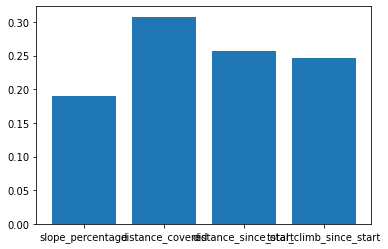

In [137]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(X.columns, importance)
plt.show()

In [138]:
model.predict([[-3,300,5000,20]])

c:\Users\OZGUN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([14.0695])

In [139]:
import os
from gpx_file_reader import GPXFile
from visualization import *
from math_calculations import *
from dataframe_operations import *

gpxFile = GPXFile('sirkeci.gpx')
print(f"Analyzing: banaz.gpx")
gpxDF = gpxFile.get_gpx_dataframe()
gpxDF.head()

Analyzing: banaz.gpx


,lat,lon,ele,time
0,41.018050,28.973273,5.739,2020-11-15 11:58:34
1,41.018058,28.973205,5.601,2020-11-15 11:58:38
2,41.018068,28.973129,5.621,2020-11-15 11:58:42
3,41.018069,28.973054,7.708,2020-11-15 11:58:44
4,41.018068,28.972965,7.779,2020-11-15 11:58:46


In [140]:
gpxDF, grDF, ssDF = all_operations(gpxDF)
ssDF

c:\Users\OZGUN\Documents\GitHub\iuc-mak-pro-i\src\dataframe_operations.py:180: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

c:\Users\OZGUN\Documents\GitHub\iuc-mak-pro-i\src\dataframe_operations.py:182: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,start_lat,start_lon,end_lat,end_lon,distance_covered,distance_since_start,elevation_change,elevation,time_since_start,time_elapsed,pct_of_total_ride,elevation_gain,elevation_lost,avg_velocity_kmh,slope_percentage,total_climb_since_start,all_time_avg_kmh,is_he_resting
0,41.018058,28.973205,41.020511,28.963820,1037.72,0.00,5.77,5.601,0.0,243.0,5.32,10.50,4.87,15.37,1.0,10.50,7.0,False
1,41.020511,28.963820,41.022782,28.961297,335.21,1037.72,-2.76,11.369,243.0,155.0,1.72,2.03,4.76,7.79,-1.0,12.53,7.0,False
2,41.022782,28.961297,41.026788,28.958463,517.39,1372.93,0.41,8.611,398.0,134.0,2.65,2.93,2.54,13.90,1.0,15.46,7.0,False
3,41.026788,28.958463,41.028662,28.953781,479.91,1890.32,1.95,9.025,532.0,149.0,2.46,3.49,1.67,11.60,1.0,18.95,7.0,False
4,41.028662,28.953781,41.031558,28.950488,438.68,2370.23,-3.17,10.977,681.0,76.0,2.25,1.21,3.95,20.78,-1.0,20.16,7.0,False
5,41.031558,28.950488,41.029867,28.950946,1130.88,2808.91,7.59,7.803,757.0,732.0,5.80,13.34,6.10,5.56,1.0,33.51,7.0,False
6,41.029867,28.950946,41.032741,28.949288,415.41,3939.79,-6.61,15.390,1489.0,245.0,2.13,1.96,8.47,6.10,-2.0,35.47,7.0,False
7,41.032741,28.949288,41.037818,28.945214,680.15,4355.19,2.92,8.780,1734.0,124.0,3.49,4.54,1.71,19.75,1.0,40.01,7.0,False
8,41.037818,28.945214,41.040758,28.940452,546.21,5035.34,-1.40,11.695,1858.0,155.0,2.80,2.08,3.48,12.69,-1.0,42.09,7.0,False
9,41.040758,28.940452,41.043323,28.937577,395.70,5581.55,-2.49,10.298,2013.0,71.0,2.03,0.92,3.39,20.06,-1.0,43.01,7.0,False


In [141]:
ssDF.drop(ssDF[ssDF.distance_covered < 3].index, inplace=True)
ssDF.drop(ssDF[ssDF.avg_velocity_kmh < 7].index, inplace=True)
ssDF.drop(ssDF[ssDF.slope_percentage > 8].index, inplace=True)
ssDF.drop(ssDF[ssDF.slope_percentage < -8].index, inplace=True)
ssDF = ssDF[['slope_percentage','distance_covered','distance_since_start','total_climb_since_start','avg_velocity_kmh']]
ssDF

,slope_percentage,distance_covered,distance_since_start,total_climb_since_start,avg_velocity_kmh
0,1.0,1037.72,0.00,10.50,15.37
1,-1.0,335.21,1037.72,12.53,7.79
2,1.0,517.39,1372.93,15.46,13.90
3,1.0,479.91,1890.32,18.95,11.60
4,-1.0,438.68,2370.23,20.16,20.78
7,1.0,680.15,4355.19,40.01,19.75
8,-1.0,546.21,5035.34,42.09,12.69
9,-1.0,395.70,5581.55,43.01,20.06
10,1.0,200.86,5977.25,44.71,16.43
12,1.0,1231.98,6405.62,56.56,10.24


In [142]:
X_sirkeci = ssDF[['slope_percentage','distance_covered','distance_since_start','total_climb_since_start']]
model.predict(X_sirkeci)

array([15.8821, 16.1895, 15.2375, 15.7046, 16.6232, 14.6627, 17.414 ,
       15.5906, 13.3848, 16.4124, 14.7648, 11.9136, 20.8929, 19.4549,
       15.3667, 15.2288, 16.3447, 14.1138, 15.1473, 13.621 , 15.8163,
       18.2011, 16.8727, 10.0345, 17.8327, 15.8473])

In [143]:
velocities = model.predict(X_sirkeci)

In [144]:
X_sirkeci['velocity'] = velocities

In [145]:
predicted_df = X_sirkeci
predicted_df

,slope_percentage,distance_covered,distance_since_start,total_climb_since_start,velocity
0,1.0,1037.72,0.00,10.50,15.8821
1,-1.0,335.21,1037.72,12.53,16.1895
2,1.0,517.39,1372.93,15.46,15.2375
3,1.0,479.91,1890.32,18.95,15.7046
4,-1.0,438.68,2370.23,20.16,16.6232
7,1.0,680.15,4355.19,40.01,14.6627
8,-1.0,546.21,5035.34,42.09,17.4140
9,-1.0,395.70,5581.55,43.01,15.5906
10,1.0,200.86,5977.25,44.71,13.3848
12,1.0,1231.98,6405.62,56.56,16.4124


In [146]:
predicted_df['time_elapsed'] = predicted_df.apply(lambda x: (x['distance_covered']/1000) / x['velocity'], axis=1)
predicted_df


,slope_percentage,distance_covered,distance_since_start,total_climb_since_start,velocity,time_elapsed
0,1.0,1037.72,0.00,10.50,15.8821,0.065339
1,-1.0,335.21,1037.72,12.53,16.1895,0.020705
2,1.0,517.39,1372.93,15.46,15.2375,0.033955
3,1.0,479.91,1890.32,18.95,15.7046,0.030559
4,-1.0,438.68,2370.23,20.16,16.6232,0.026390
7,1.0,680.15,4355.19,40.01,14.6627,0.046386
8,-1.0,546.21,5035.34,42.09,17.4140,0.031366
9,-1.0,395.70,5581.55,43.01,15.5906,0.025381
10,1.0,200.86,5977.25,44.71,13.3848,0.015007
12,1.0,1231.98,6405.62,56.56,16.4124,0.075064


In [147]:
predicted_df['time_elapsed'].sum()

0.9641735705970501

In [148]:
# 1 saatte bitirilir